**Tugas Besar Machine Learning**

***Classification***

Vharrel Devana I - 130118xxxx

Syamsul Rizal - 130118xxxx

IF-42-01

#Library

In [ ]:
#library yang digunakan untuk preprocessing
import pandas as pd
import numpy as np 
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [ ]:
#import data dari github
train = 'https://raw.githubusercontent.com/rizalsyamsul/Malin/main/salju_train.csv'
test = 'https://raw.githubusercontent.com/rizalsyamsul/Malin/main/salju_test.csv'

# Eksplorasi dan Persiapan Data

## Eksplorasi Data

Untuk data Salju ini kami menggunakan 6 kolom data yang dianggap cukup penting untuk mengukur apakah besok bersalju atau tidak beserta 1 kolom label yang dipakai untuk klasifikasi

In [ ]:
#read csv dari data train yang telah dan mengambil 6 kolom data beserta 1 label
df_train = pd.read_csv(train)
df_train = df_train[['SuhuMin','SuhuMax','Hujan','SinarMatahari','Awan3pm','Suhu3pm','BersaljuBesok']]
df_train.head()

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Awan3pm,Suhu3pm,BersaljuBesok
0,10.4,15.5,4.8,NaN,NaN,15.0,Tidak
1,9.0,17.0,8.0,7.4,5.0,15.5,Ya
2,18.2,32.0,0.0,NaN,NaN,29.6,Tidak
3,7.3,24.5,0.0,10.4,7.0,23.2,Tidak
4,5.9,20.3,0.0,12.6,6.0,18.1,Tidak


In [ ]:
#membuat data bersaljubesok menjadi numerik dengan ketentuan tidak :0 dan ya:1
df_train['BersaljuBesok'] = df_train['BersaljuBesok'].replace({'Tidak': 0, 'Ya': 1})

In [ ]:
df_train.head()

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Awan3pm,Suhu3pm,BersaljuBesok
0,10.4,15.5,4.8,NaN,NaN,15.0,0.0
1,9.0,17.0,8.0,7.4,5.0,15.5,1.0
2,18.2,32.0,0.0,NaN,NaN,29.6,0.0
3,7.3,24.5,0.0,10.4,7.0,23.2,0.0
4,5.9,20.3,0.0,12.6,6.0,18.1,0.0


In [ ]:
#read csv dari data test yang telah dan mengambil 6 kolom data beserta 1 label
df_test = pd.read_csv(test)
df_test = df_test[['SuhuMin','SuhuMax','Hujan','SinarMatahari','Awan3pm','Suhu3pm','BersaljuBesok']]
df_test.head()

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Awan3pm,Suhu3pm,BersaljuBesok
0,11.0,27.5,0.0,6.4,7.0,23.6,No
1,10.0,19.9,0.2,NaN,1.0,18.9,Yes
2,9.2,27.2,0.0,10.4,1.0,26.3,No
3,17.7,27.0,0.0,6.7,6.0,26.4,No
4,2.3,7.9,88.0,NaN,NaN,6.0,No


In [ ]:
#membuat data bersaljubesok menjadi numerik dengan ketentuan tidak :0 dan ya:1
df_test['BersaljuBesok'] = df_test['BersaljuBesok'].replace({'No': 0, 'Yes': 1})

In [ ]:
df_test.head()

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Awan3pm,Suhu3pm,BersaljuBesok
0,11.0,27.5,0.0,6.4,7.0,23.6,0.0
1,10.0,19.9,0.2,NaN,1.0,18.9,1.0
2,9.2,27.2,0.0,10.4,1.0,26.3,0.0
3,17.7,27.0,0.0,6.7,6.0,26.4,0.0
4,2.3,7.9,88.0,NaN,NaN,6.0,0.0


## Persiapan/Pre-Processing Data

**Cleansing**
> Menghapus nilai null dari dataset

In [ ]:
#mengecek data train apakah memiliki nilai null
df_train.isnull().sum()

SuhuMin           1122
SuhuMax            929
Hujan             2431
SinarMatahari    52379
Awan3pm          44471
Suhu3pm           2698
BersaljuBesok     2431
dtype: int64

In [ ]:
#mengecek data test apakah memiliki nilai null
df_test.isnull().sum()

SuhuMin           165
SuhuMax           165
Hujan             387
SinarMatahari    8718
Awan3pm          7456
Suhu3pm           442
BersaljuBesok     419
dtype: int64

In [ ]:
#drop nilai null dari kedua data train dan data test
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [ ]:
#mengecek kembalu data train apakah masih memiliki nilai null
df_train.isnull().sum()

SuhuMin          0
SuhuMax          0
Hujan            0
SinarMatahari    0
Awan3pm          0
Suhu3pm          0
BersaljuBesok    0
dtype: int64

In [ ]:
#mengecek kembalu data test apakah masih memiliki nilai null
df_test.isnull().sum()

SuhuMin          0
SuhuMax          0
Hujan            0
SinarMatahari    0
Awan3pm          0
Suhu3pm          0
BersaljuBesok    0
dtype: int64

**Outlier**
> Menghapus Outliers atau data yang tidak stabil pada seluruh kolom yang ada, ini bertujuan untuk membuat data lebih bersih dan stabil

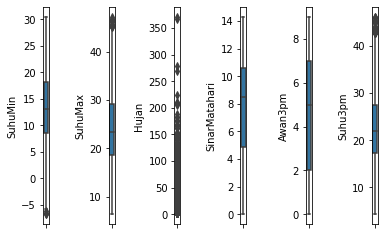

In [ ]:
#mengecek outliers data train menggunakan boxplot dari seaborn
f, a = plt.subplots(1, 6)
mp.rcParams['figure.dpi'] = 120

sns.boxplot(y=df_train["SuhuMin"], ax=a[0])
sns.boxplot(y=df_train["SuhuMax"], ax=a[1])
sns.boxplot(y=df_train["Hujan"], ax=a[2])
sns.boxplot(y=df_train["SinarMatahari"], ax=a[3])
sns.boxplot(y=df_train["Awan3pm"], ax=a[4])
sns.boxplot(y=df_train["Suhu3pm"], ax=a[5])

plt.subplots_adjust(wspace=10)

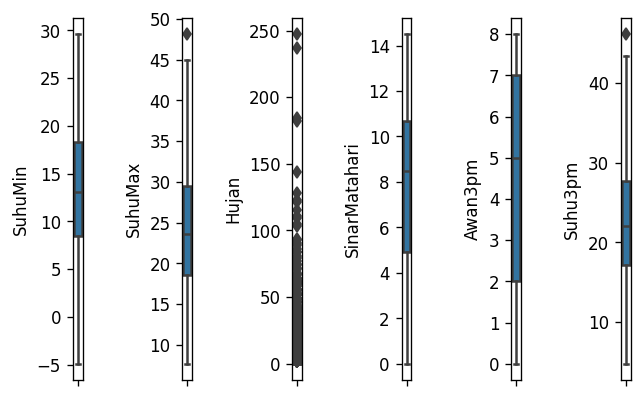

In [ ]:
#mengecek outliers data test menggunakan boxplot dari seaborn
f, a = plt.subplots(1, 6)
mp.rcParams['figure.dpi'] = 120

sns.boxplot(y=df_test["SuhuMin"], ax=a[0])
sns.boxplot(y=df_test["SuhuMax"], ax=a[1])
sns.boxplot(y=df_test["Hujan"], ax=a[2])
sns.boxplot(y=df_test["SinarMatahari"], ax=a[3])
sns.boxplot(y=df_test["Awan3pm"], ax=a[4])
sns.boxplot(y=df_test["Suhu3pm"], ax=a[5])

plt.subplots_adjust(wspace=10)

In [ ]:
#fungsi untuk menghapus outlier
def out(data, kolom):
    atas = data[kolom].quantile(.75)
    bawah = data[kolom].quantile(.25)
    kuartil = atas-bawah

    batasbawah = bawah - 1.5*kuartil
    batasatas = atas + 1.5*kuartil
    
    res = data.loc[(data[kolom] > batasbawah) & (data[kolom] < batasatas)]

    return res

In [ ]:
#memanggil fungsi out dan dimasukan kembali kedalam data train
df_train = out(df_train,'Hujan')
df_train = out(df_train,'SinarMatahari')
df_train = out(df_train,'SuhuMax')
df_train = out(df_train,'Suhu3pm')
df_train = out(df_train,'SuhuMin')
df_train = out(df_train,'Awan3pm')

In [ ]:
#memanggil fungsi out dan dimasukan kembali kedalam data test
df_test = out(df_test,'Hujan')
df_test = out(df_test,'SinarMatahari')
df_test = out(df_test,'SuhuMax')
df_test = out(df_test,'Suhu3pm')
df_test = out(df_test,'SuhuMin')
df_test = out(df_test,'Awan3pm')

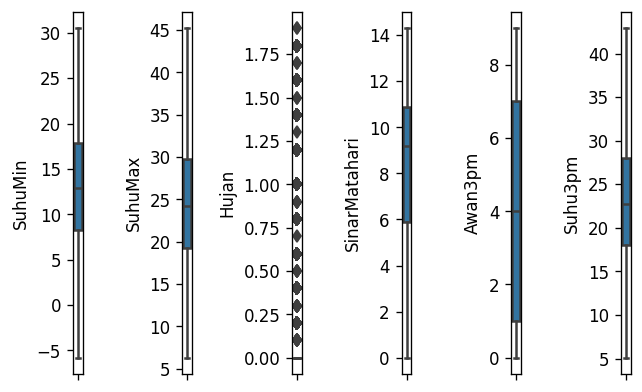

In [ ]:
#mengecek kembali outliers data train menggunakan boxplot dari seaborn
f, a = plt.subplots(1, 6)
mp.rcParams['figure.dpi'] = 100

sns.boxplot(y=df_train["SuhuMin"], ax=a[0])
sns.boxplot(y=df_train["SuhuMax"], ax=a[1])
sns.boxplot(y=df_train["Hujan"], ax=a[2])
sns.boxplot(y=df_train["SinarMatahari"], ax=a[3])
sns.boxplot(y=df_train["Awan3pm"], ax=a[4])
sns.boxplot(y=df_train["Suhu3pm"], ax=a[5])

plt.subplots_adjust(wspace=10)

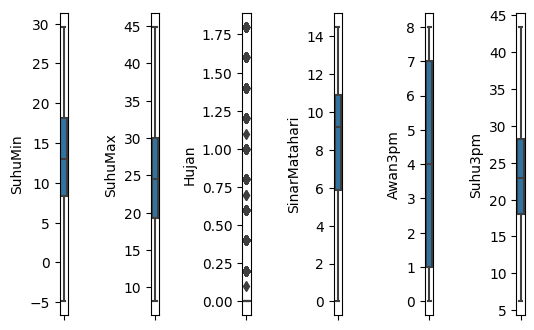

In [ ]:
#mengecek kembali outliers data test menggunakan boxplot dari seaborn
f, a = plt.subplots(1, 6)
mp.rcParams['figure.dpi'] = 120

sns.boxplot(y=df_test["SuhuMin"], ax=a[0])
sns.boxplot(y=df_test["SuhuMax"], ax=a[1])
sns.boxplot(y=df_test["Hujan"], ax=a[2])
sns.boxplot(y=df_test["SinarMatahari"], ax=a[3])
sns.boxplot(y=df_test["Awan3pm"], ax=a[4])
sns.boxplot(y=df_test["Suhu3pm"], ax=a[5])

plt.subplots_adjust(wspace=10)

**Reset Index**
> Mereset index dari data train dan data test

In [ ]:
#mereset index data train
df_train = df_train.reset_index(drop=True)
df_train

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Awan3pm,Suhu3pm,BersaljuBesok
0,7.3,24.5,0.0,10.4,7.0,23.2,0.0
1,5.9,20.3,0.0,12.6,6.0,18.1,0.0
2,14.4,21.8,0.0,4.4,7.0,21.1,0.0
3,7.7,18.7,0.2,9.7,1.0,18.3,0.0
4,18.4,35.3,0.0,12.5,0.0,34.9,0.0
...,...,...,...,...,...,...,...
39207,16.8,34.1,0.0,10.3,4.0,33.0,0.0
39208,8.7,19.0,0.0,9.6,2.0,16.5,0.0
39209,14.3,26.2,0.0,12.6,2.0,25.5,0.0
39210,20.1,23.7,0.0,8.9,6.0,22.1,1.0


In [ ]:
#mereset index data test
df_test = df_test.reset_index(drop=True)
df_test

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Awan3pm,Suhu3pm,BersaljuBesok
0,11.0,27.5,0.0,6.4,7.0,23.6,0.0
1,9.2,27.2,0.0,10.4,1.0,26.3,0.0
2,17.7,27.0,0.0,6.7,6.0,26.4,0.0
3,14.4,22.4,0.0,3.9,7.0,20.9,0.0
4,20.3,33.7,0.0,11.1,5.0,32.2,0.0
...,...,...,...,...,...,...,...
6555,13.4,24.9,0.0,9.7,7.0,23.7,0.0
6556,14.6,27.8,0.0,10.1,2.0,25.3,0.0
6557,7.8,25.8,0.0,13.2,1.0,24.0,0.0
6558,12.4,26.6,0.0,11.6,1.0,25.7,0.0


**X dan Y**
> memecah data kedalam data X dan Y dengan ketentuan X data keseluruhan dan Y data label

In [ ]:
#memasukan data train keseluruhan selain label pada variabel x
x_train = df_train.iloc[1:, :-1]
#memasukan data value label train kedalam variabel y yang berbentuk array
y_train = df_train.iloc[1:, 6].values

In [ ]:
#memasukan data test keseluruhan selain label pada variabel x
x_test = df_test.iloc[1:, :-1]
#memasukan data value label test kedalam variabel y yang berbentuk array
y_test = df_test.iloc[1:, 6].values

In [ ]:
y_train

array([0., 0., 0., ..., 0., 1., 0.])

In [ ]:
y_test

array([0., 0., 0., ..., 0., 0., 0.])

**Scaling**
> Scaling dengan menggunakan MinMaxScaleer, ini dipilih untuk membuat persebaran data menjadi tidak terlalu jauh nilainya

In [ ]:
#melakukan scaling terhadap x_train
x_train = MinMaxScaler().fit_transform(x_train)

In [ ]:
#melakukan scaling terhadap x_test
x_test = MinMaxScaler().fit_transform(x_test)

In [ ]:
x_train

array([[0.32231405, 0.35989717, 0.        , 0.88111888, 0.66666667,
        0.34391534],
       [0.55647383, 0.39845758, 0.        , 0.30769231, 0.77777778,
        0.42328042],
       [0.37190083, 0.31876607, 0.10526316, 0.67832168, 0.11111111,
        0.34920635],
       ...,
       [0.55371901, 0.51156812, 0.        , 0.88111888, 0.22222222,
        0.53968254],
       [0.71349862, 0.44730077, 0.        , 0.62237762, 0.66666667,
        0.44973545],
       [0.45730028, 0.60411311, 0.        , 0.78321678, 0.11111111,
        0.63756614]])

In [ ]:
x_test

array([[0.40869565, 0.51902174, 0.        , 0.71724138, 0.125     ,
        0.54032258],
       [0.65507246, 0.51358696, 0.        , 0.46206897, 0.75      ,
        0.54301075],
       [0.55942029, 0.38858696, 0.        , 0.26896552, 0.875     ,
        0.39516129],
       ...,
       [0.36811594, 0.48097826, 0.        , 0.91034483, 0.125     ,
        0.47849462],
       [0.50144928, 0.50271739, 0.        , 0.8       , 0.125     ,
        0.52419355],
       [0.50434783, 0.50543478, 0.        , 0.74482759, 0.625     ,
        0.51612903]])

# Pemodelan / Classification

**Naive Bayes**
> Metode Naive Bayes adalah metode utama yang digunakan dalam klasifikasi ini

In [ ]:
#library klasifikasi dengan metode Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
#memanggil fungsi gaussian naive bayes terhadap x_train dan y_train dan memprediksi terhadap x_test
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

In [ ]:
#menampilkan hasil y_pred
y_pred

array([0., 0., 1., ..., 0., 0., 0.])

# Evaluasi

**Confusion Matrix**
> Pada tahap evaluasi ini menggunakan confusion matrix, hal ini dilakukan untuk mencari akurasi dari suatu model/classifier

In [ ]:
# library untuk pembuatan matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#menghitung akurasi dari nilai actual/y_test dengan nilai prediksi/y_pred
print("Hasil Akurasi Naive Bayes:", accuracy_score(y_test, y_pred)*100, "%")

Hasil Akurasi Naive Bayes: 77.93871016923312 %


In [ ]:
#menampilkan confusin matrix dari hasil klasifikasi
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[4496  946]
 [ 501  616]]


In [ ]:
#menampilkan classification report
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86      5442
         1.0       0.39      0.55      0.46      1117

    accuracy                           0.78      6559
   macro avg       0.65      0.69      0.66      6559
weighted avg       0.81      0.78      0.79      6559



In [ ]:
#membuat dataframe untuk membandingkan nilai actual dan nilai prediksi 
df = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
df

,Actual,Predict
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,1.0
...,...,...
6554,0.0,0.0
6555,0.0,0.0
6556,0.0,0.0
6557,0.0,0.0


**Export Data**
> Pada tahap ini data hasil klasifikasi akan diexport menjadi csv melalui google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_csv("drive/My Drive/TubesMalin/hasil_klasifikasi_saljuNB.csv")

# Eksperimen

Pada Tahap Eksperimen ini kami membandingkan hasil akurasi beberapa metode klasifikasi yaitu

*   SVM
*   KNN
*   Random Forest








## Ekperimen 1

**SVM**

In [ ]:
#library
from sklearn import svm

In [ ]:
#memanggil fungsi svm dengan kernel rbf 
svm = svm.SVC(kernel='rbf')
svm.fit(x_train, y_train)
y_pred1 = svm.predict(x_test)
y_pred1

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
#menghitung akurasi dari nilai actual/y_test dengan nilai prediksi/y_pred
print("Hasil akurasi SVM : ", accuracy_score(y_test, y_pred1)*100, "%")

Hasil akurasi SVM :  85.24165269095899 %


In [ ]:
#menampilkan confusion matrix dari hasil klasifikasi
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred1))

Confusion Matrix
[[5279  163]
 [ 805  312]]


In [ ]:
#menampilkan classification report
print("Classification Report")
print(classification_report(y_test,y_pred1))

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      5442
         1.0       0.66      0.28      0.39      1117

    accuracy                           0.85      6559
   macro avg       0.76      0.62      0.65      6559
weighted avg       0.83      0.85      0.83      6559



In [ ]:
#membuat dataframe untuk membandingkan nilai actual dan nilai prediksi 
df1 = pd.DataFrame({'Actual': y_test, 'Predict': y_pred1})
df1

,Actual,Predict
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
6554,0.0,0.0
6555,0.0,0.0
6556,0.0,0.0
6557,0.0,0.0


**Export Data**
> Pada tahap ini data hasil klasifikasi akan diexport menjadi csv melalui google drive

In [ ]:
df1.to_csv("drive/My Drive/TubesMalin/hasil_klasifikasi_saljuSVM.csv")

## Ekperimen 2

**KNN**

In [ ]:
#Library untuk KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#memanggil fungsi KNeighborsClassifier dengan parameter n = 5
KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(x_train, y_train)
y_pred2 = KNNclassifier.predict(x_test)
y_pred2

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
#menghitung akurasi dari nilai actual/y_test dengan nilai prediksi/y_pred
print("Hasil akurasi KNN : ", accuracy_score(y_test, y_pred2)*100, "%")

Hasil akurasi KNN :  82.83274889464857 %


In [ ]:
#menampilkan confusion matrix dari hasil klasifikasi
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred2))

Confusion Matrix
[[5023  419]
 [ 707  410]]


In [ ]:
#menampilkan classification report
print("Classification report")
print(classification_report(y_test,y_pred2))

Classification report
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      5442
         1.0       0.49      0.37      0.42      1117

    accuracy                           0.83      6559
   macro avg       0.69      0.65      0.66      6559
weighted avg       0.81      0.83      0.82      6559



In [ ]:
#membuat dataframe untuk membandingkan nilai actual dan nilai prediksi 
df2 = pd.DataFrame({'Actual': y_test, 'Predict': y_pred2})
df2

,Actual,Predict
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
6554,0.0,0.0
6555,0.0,0.0
6556,0.0,0.0
6557,0.0,0.0


**Export Data**
> Pada tahap ini data hasil klasifikasi akan diexport menjadi csv melalui google drive

In [ ]:
df2.to_csv("drive/My Drive/TubesMalin/hasil_klasifikasi_saljuKNN.csv")

## Ekperimen 3

**Random Forest**

In [ ]:
#Library untuk Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#memanggil fungsi RandomForestClassifier dengan jumlah tree/n = 1000
RF = RandomForestClassifier(n_estimators=1000)
RF.fit(x_train, y_train)
y_pred3 = RF.predict(x_test)
y_pred3

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
#menghitung akurasi dari nilai actual/y_test dengan nilai prediksi/y_pred
print("Hasil akurasi Random Forest : ", accuracy_score(y_test, y_pred3)*100, "%")

Hasil akurasi Random Forest :  83.96096966000914 %


In [ ]:
#menampilkan confusion matrix dari hasil klasifikasi
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred3))

Confusion Matrix
[[5099  343]
 [ 709  408]]


In [ ]:
#menampilkan classification report
print("Classification report")
print(classification_report(y_test,y_pred3))

Classification report
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      5442
         1.0       0.54      0.37      0.44      1117

    accuracy                           0.84      6559
   macro avg       0.71      0.65      0.67      6559
weighted avg       0.82      0.84      0.83      6559



In [ ]:
#membuat dataframe untuk membandingkan nilai actual dan nilai prediksi 
df3 = pd.DataFrame({'Actual': y_test, 'Predict': y_pred3})
df3

,Actual,Predict
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
6554,0.0,0.0
6555,0.0,0.0
6556,0.0,0.0
6557,0.0,0.0


**Export Data**
> Pada tahap ini data hasil klasifikasi akan diexport menjadi csv melalui google drive

In [ ]:
df3.to_csv("drive/My Drive/TubesMalin/hasil_klasifikasi_saljuRF.csv")

#Kesimpulan

Pengklasifikasian awal nya diuji menggunakan metode naive bayers. Diperoleh tingkat akurasi data sebesar **0.7793871016923312** atau **78%** pembulatan keatas

Nilai akurasi tersebut berbeda dengan eksperimen yang telah dilakukan diantaranya:

*   Menggunakan metode SVM : **0.8524165269095899** atau **85%**
*   Menggunakan metode KNN : **0.8283274889464858** atau **82%**
*   Menggunakan metode Random Forest : **0.8396096966000914** atau **83%**


Metode klasifikasi yang menghasilkan akurasi tinggi terhadap dataset salju adalah metode SVM dengan kernel rbf.